# Trim Envelope

Calculate the set of trim points for an aircraft over a range of airspeeds
and range of flight path angles $\gamma$. The required thrust and AoA is
indicated via a colormap for each trim point.

In [ ]:
# Confirm that JSBSim is installed. If not and running on Google Colab
# then install JSBSim into the Google Colab instance.
import jsbsim
print('JSBSim is installed')

<>:80: SyntaxWarning: invalid escape sequence '\g'
<>:80: SyntaxWarning: invalid escape sequence '\g'
C:\Users\tejad\AppData\Local\Temp\ipykernel_3284\838357096.py:80: SyntaxWarning: invalid escape sequence '\g'
  ax.set_ylabel('Flight Path Angle $\gamma$ (deg)')


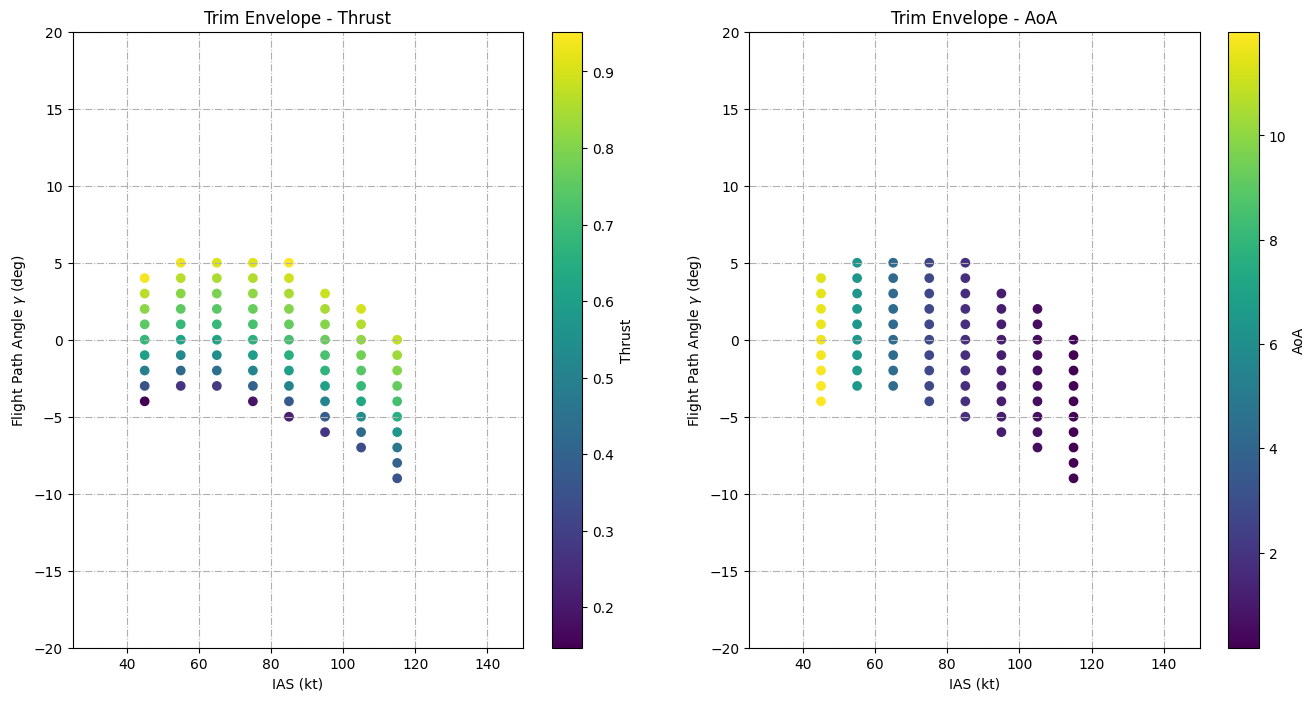

In [1]:
import jsbsim
import matplotlib.pyplot as plt
import math

# Global variables that must be modified to match your particular need
# The aircraft name
# Note - It should match the exact spelling of the model file
AIRCRAFT_NAME="c172x"
# Path to JSBSim files, location of the folders "aircraft", "engines" and "systems"
PATH_TO_JSBSIM_FILES=r"D:\1DrvTK\OneDrive\GitHub\ADMBenchmark\.venv\Lib\site-packages\jsbsim"

# Avoid flooding the console with log messages
jsbsim.FGJSBBase().debug_lvl = 0

fdm = jsbsim.FGFDMExec(PATH_TO_JSBSIM_FILES)

# Load the aircraft model
fdm.load_model(AIRCRAFT_NAME)

# Set engines running
fdm['propulsion/set-running'] = -1

# Set alpha range for trim solutions
fdm['aero/alpha-max-rad'] = math.radians(16)
fdm['aero/alpha-min-rad'] = math.radians(-5)

# Set envelope limits
min_speed = 45
max_speed = 130
altitude = 5000
min_gamma = -10
max_gamma = 10

# Trim results
results = []

# Iterate over a range of speeds and for each speed a range of flight path angles (gamma)
# and check whether a trim point is possible
for speed in range(min_speed, max_speed, 10):
    for gamma in range(min_gamma, max_gamma, 1):
        fdm['ic/h-sl-ft'] = altitude
        fdm['ic/vc-kts'] = speed
        fdm['ic/gamma-deg'] = gamma

        # Initialize the aircraft with initial conditions
        fdm.run_ic()

        # Trim
        try:
            fdm['simulation/do_simple_trim'] = 1
            results.append((fdm['velocities/vc-kts'], fdm['aero/alpha-deg'], gamma, fdm['fcs/throttle-cmd-norm[0]']))
        except jsbsim.TrimFailureError:
            pass  # Ignore trim failures

# Extract the trim results
speed, alpha, gamma, throttle = zip(*results)

plt.rcParams["figure.figsize"] = (16, 8)

# Plot the trim envelope results, with required thrust and AoA indicated via a colormap
fig, (axThrust, axAoA) = plt.subplots(1, 2)

# Graph data for each of the sub plots
graph_data = [ ('Thrust', axThrust, throttle), ('AoA', axAoA, alpha) ]

for title, ax, data in graph_data:
    # Scatter plot with airspeed on x-axis, gamma on y-axis and either thrust setting or
    # AoA indicated via color map
    scatter = ax.scatter(speed, gamma, c=data, cmap='viridis')
    cb = fig.colorbar(scatter, ax=ax)
    cb.set_label(title)

    # Graph axis range for speed and gamma
    ax.set_xlim(min_speed - 20, max_speed + 20)
    ax.set_ylim(min_gamma * 2, max_gamma * 2)

    ax.grid(True, linestyle='-.')

    ax.set_xlabel('IAS (kt)')
    ax.set_ylabel('Flight Path Angle $\gamma$ (deg)')
    ax.set_title(f'Trim Envelope - {title}')

plt.show()

In [1]:
import jsbsim
import matplotlib.pyplot as plt
import math

# Global variables that must be modified to match your particular need
# The aircraft name
# Note - It should match the exact spelling of the model file
AIRCRAFT_NAME="c172x"
# Path to JSBSim files, location of the folders "aircraft", "engines" and "systems"
PATH_TO_JSBSIM_FILES=r"D:\1DrvTK\OneDrive\GitHub\ADMBenchmark\.venv\Lib\site-packages\jsbsim"

# Avoid flooding the console with log messages
jsbsim.FGJSBBase().debug_lvl = 0

fdm = jsbsim.FGFDMExec(PATH_TO_JSBSIM_FILES)

# Load the aircraft model
fdm.load_model(AIRCRAFT_NAME)

# Set engines running
fdm['propulsion/set-running'] = -1

# Set alpha range for trim solutions
fdm['aero/alpha-max-rad'] = math.radians(16)
fdm['aero/alpha-min-rad'] = math.radians(-5)

fdm['ic/h-sl-ft'] = 5000
fdm['ic/vc-kts'] = 92
fdm['ic/gamma-deg'] = -1.2
fdm.set_dt(1/60)

# Initialize the aircraft with initial conditions
fdm.run_ic()

# Trim
result = None
try:
    fdm["simulation/do_simple_trim"] = 1
    result = ((fdm['velocities/vc-kts'], fdm['aero/alpha-deg'], fdm['ic/gamma-deg'], fdm['fcs/throttle-cmd-norm[0]'], fdm['fcs/pitch-trim-cmd-norm']))
except jsbsim.TrimFailureError:
   result = "fail"

for _ in range(10000):
    # fdm['fcs/throttle-cmd-norm[0]'] = 0.7491394680327775
    # fdm['fcs/pitch-trim-cmd-norm'] = 0.19466576008433312
    fdm.run()

result = (fdm['velocities/vc-kts'], fdm['aero/alpha-deg'], fdm['ic/gamma-deg'], fdm['fcs/throttle-cmd-norm[0]'], fdm['fcs/pitch-trim-cmd-norm'],
fdm['position/h-sl-ft'], fdm['fcs/mixture-cmd-norm'])


print(result)

(91.91963852851822, 1.2580105533042174, -1.2, 0.6926642302717215, 0.1913423700459227, 4456.284186191857, 0.8488386124320397)
